# Example: Feed Shapes Preview

Let’s look inside an example feed and generate a locator map to see its precincts.

We’ll start by loading the feed.

In [1]:
import OpenPrecincts

feed = OpenPrecincts.load_feed('OpenPrecincts-Example-0.1.zip')

Next, we will select just the shapes that are present in the `precincts` frame, ignoring district shapes which can cover a much larger area. We are interested in the geographic bounds of the precincts in this feed.

In [2]:
import geopandas, pandas

precinct_shapes = OpenPrecincts.add_geometry(feed.precincts, feed.shapes)
precinct_shapes.total_bounds

array([-79.54248999,  35.254663  , -78.06460299,  36.249851  ])

Last, we plot the `shapes` frame using `OpenPrecincts.preview.shapes_plot()` and the precincts’ geographic bounds to limit the area of the map to just our two sample counties. We can use [annotations](https://matplotlib.org/users/annotations_intro.html) to call out a few points of interest.

Text(-8783107.823589286, 4300621.372044271, 'Durham')

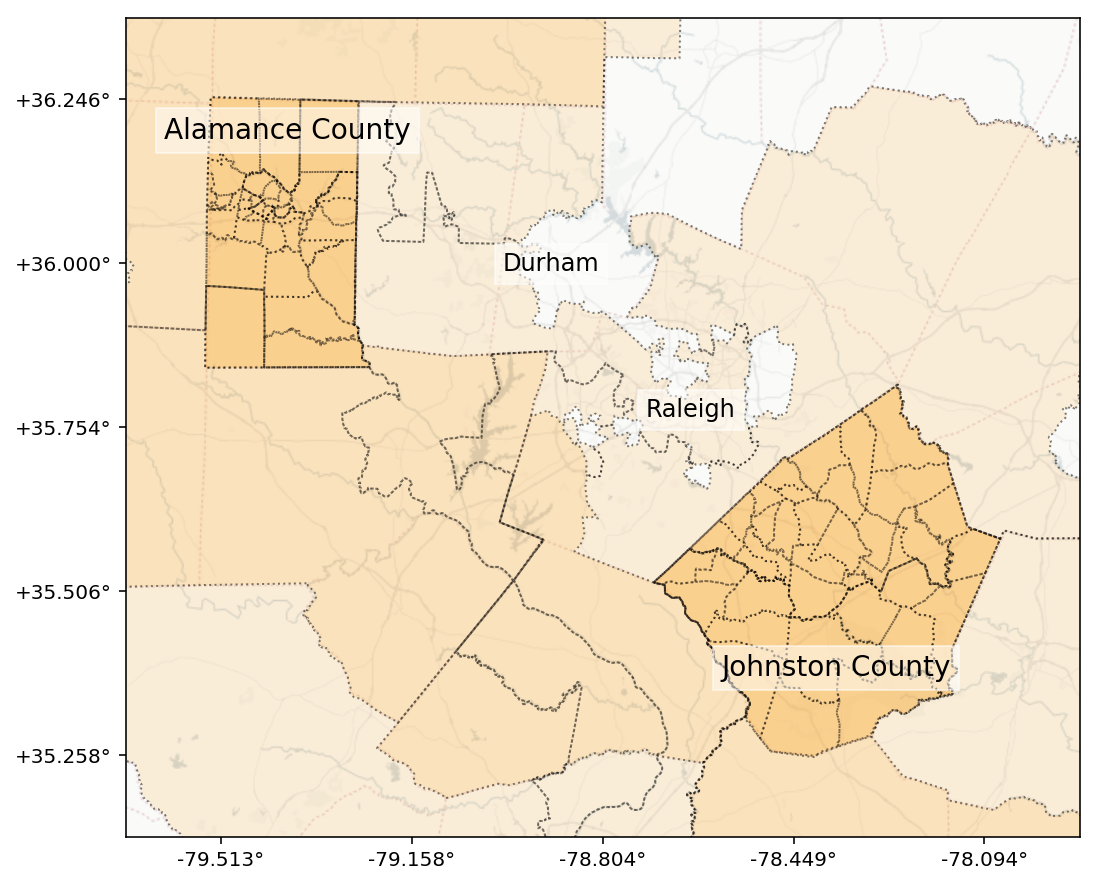

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import OpenPrecincts.preview, mercantile as m

plot = OpenPrecincts.preview.shapes_plot(feed.shapes,
    bounds=precinct_shapes.total_bounds)

akw = dict(backgroundcolor='#ffffff80',
    verticalalignment='center', horizontalalignment='center')

plot.annotate(xy=m.xy(-79.39, 36.20), fontsize=14, s='Alamance County', **akw)
plot.annotate(xy=m.xy(-78.37, 35.39), fontsize=14, s='Johnston County', **akw)
plot.annotate(xy=m.xy(-78.64, 35.78), fontsize=12, s='Raleigh', **akw)
plot.annotate(xy=m.xy(-78.90, 36.00), fontsize=12, s='Durham', **akw)